# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-10-19 11:26:05--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.8’

car_data.csv.8      100%[===================>]  57.01K  --.-KB/s    in 0.008s  

2023-10-19 11:26:05 (6.71 MB/s) - ‘car_data.csv.8’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
1,226,107,54,98,210,66,11,218,31,24,169,221,704,216,71,14,0,188,197
2,31,88,42,77,151,58,8,140,47,18,142,165,293,158,64,10,11,198,205
3,361,101,46,105,195,61,10,198,34,23,150,213,578,195,66,7,38,192,205
4,372,97,47,87,164,64,9,156,43,20,149,173,359,182,68,1,13,192,202
5,495,94,45,72,179,69,6,156,41,19,144,181,373,191,69,5,5,193,198
6,285,89,48,85,189,64,8,169,39,20,153,188,427,190,64,16,5,195,201
7,329,89,38,80,169,59,7,161,41,20,131,186,389,137,68,5,15,192,197
8,774,94,37,72,146,60,9,133,50,18,135,161,262,128,69,2,7,192,195
9,116,100,45,100,209,65,8,201,32,23,147,231,611,189,72,5,5,189,195


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.792350,93.828780,44.941712,82.147541,168.945355,61.539162,8.393443,169.249545,40.872495,20.612022,148.224044,188.75592,442.499089,175.429872,72.342441,6.156648,12.453552,189.016393,195.734062
std,242.739551,8.206494,6.249107,15.949684,33.073419,7.062082,3.910265,33.758611,7.857893,2.628577,14.489705,31.80751,180.392563,33.505489,7.444885,4.811886,9.019046,6.198194,7.601764
min,1.000000,76.000000,33.000000,40.000000,110.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.00000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,215.000000,88.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.00000,318.000000,150.000000,67.000000,2.000000,5.000000,185.000000,190.000000
50%,416.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.00000,363.000000,174.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,635.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,161.000000,217.00000,600.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,306.000000,126.000000,52.000000,265.000000,61.000000,29.000000,186.000000,288.00000,1018.000000,268.000000,127.000000,22.000000,40.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import LabelEncoder  # for transforming text variables to int class labels
from sklearn.preprocessing import StandardScaler   # transform the data onto unit scale (mean = 0 and variance = 1)
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)  # scale train data
X_test = scaler.transform(X_test)  # scale test data

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [8]:
logistic = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=1)

In [9]:
# specify parameters for grid search
parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
}

In [10]:
# specify grid search object
grid_search = GridSearchCV(estimator=logistic, param_grid=parameters)

In [11]:
grid_result = grid_search.fit(X_train, y_train)  # find best fit hyperparameters

 - The optimal hyperparameters for logistic regression with cross-validation on the train data using grid search

In [79]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.7978482068390325 using {'C': 78.47599703514607, 'penalty': 'l1'}


- Estimate the model quality with `f1` and `accuracy` scores.

In [13]:
from sklearn.metrics import f1_score, accuracy_score

In [14]:
# Estimate scores on test data
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
print("F1 score: ", f1_score(grid_result.predict(X_test), y_test, average='weighted')) # Call predict on the estimator with the best found parameters.
# Calculate accuracy
print("Accuracy: ", accuracy_score(grid_result.predict(X_test), y_test))

F1 score:  0.8117134709990296
Accuracy:  0.8114478114478114


- Plot a ROC-curve for the trained model.


In [15]:
y_probas = grid_result.predict_proba(X_test)

In [16]:
! pip install scikit-plot
from scikitplot.metrics import plot_roc

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

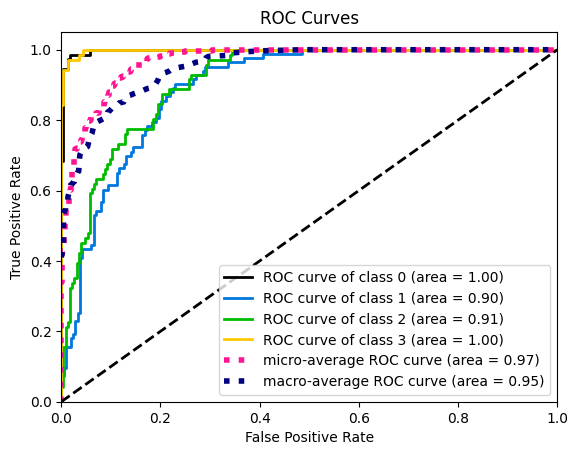

In [17]:
plot_roc(y_test, y_probas)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()

In [20]:
pca.fit(X_train)

PCA()

In [21]:
pca.explained_variance_ratio_

array([5.00836343e-01, 1.63745526e-01, 8.91989460e-02, 6.35494853e-02,
       5.04618249e-02, 4.61747387e-02, 3.16784945e-02, 2.03346869e-02,
       1.11146318e-02, 8.30255720e-03, 4.58524999e-03, 3.07575466e-03,
       2.27728551e-03, 1.74759922e-03, 1.09206932e-03, 8.18624771e-04,
       6.78491067e-04, 3.10659658e-04, 1.70317208e-05])

In [22]:
from matplotlib import pyplot as plt

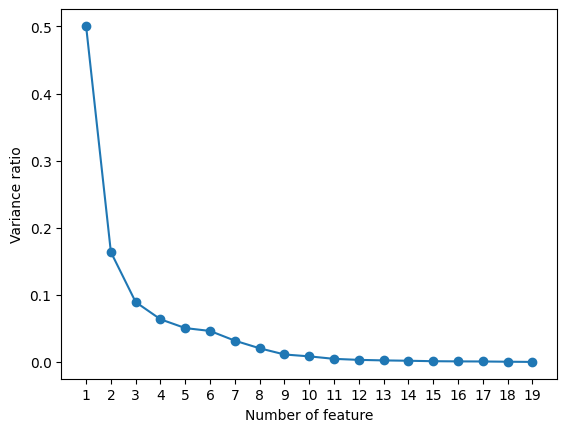

In [23]:
vector_num = np.linspace(1, 19, 19)
plt.plot(vector_num, pca.explained_variance_ratio_, marker='o')
plt.xlim(0, 20)
plt.xticks(vector_num)
plt.xlabel('Number of feature')
plt.ylabel('Variance ratio')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

**Data should be normalized to ensure to correctly perform PCA analysis.**

In [24]:
# We select the number of components to have 99% of variance is retained
num_vec = np.argmax(pca.explained_variance_ratio_ < 0.01) + 1  # +1 because indexing starts from 0 and 0.01 corresponds to 1%
print('number of components: ', num_vec)

number of components:  10


In [25]:
pca_opt = PCA(n_components=num_vec)  # PCA(n_components=0.99) leads the same result
pca_opt.fit(X_train)

PCA(n_components=10)

In [26]:
X_train_pca = pca_opt.transform(X_train)

In [27]:
X_train_pca.shape

(549, 10)

In [28]:
X_test_pca = pca_opt.transform(X_test)

In [29]:
X_test_pca.shape

(297, 10)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [30]:
logistic_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=1)

In [31]:
# specify parameters for grid search
parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-5, 5, 10),
}

In [32]:
# specify grid search object
grid_search_pca = GridSearchCV(estimator=logistic_pca, param_grid=parameters)

In [33]:
grid_result_pca = grid_search_pca.fit(X_train_pca, y_train)  # find best fit hyperparameters

 - The optimal hyperparameters for logistic regression with cross-validation on the train data using grid search

In [34]:
print(f"Best: {grid_result_pca.best_score_} using {grid_result_pca.best_params_}")

Best: 0.7232026688907423 using {'C': 3.593813663804626, 'penalty': 'l2'}


- Estimate the model quality with `f1` and `accuracy` scores.

In [35]:
from sklearn.metrics import f1_score, accuracy_score

In [36]:
# Estimate scores on test data
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
print("F1 score: ", f1_score(grid_result_pca.predict(X_test_pca), y_test, average='weighted')) # Call predict on the estimator with the best found parameters.
# Calculate accuracy
print("Accuracy: ", accuracy_score(grid_result_pca.predict(X_test_pca), y_test))

F1 score:  0.6678261202270849
Accuracy:  0.6632996632996633


- Plot a ROC-curve for the trained model.


In [37]:
y_probas = grid_result_pca.predict_proba(X_test_pca)

In [38]:
# ! pip install scikit-plot
from scikitplot.metrics import plot_roc

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

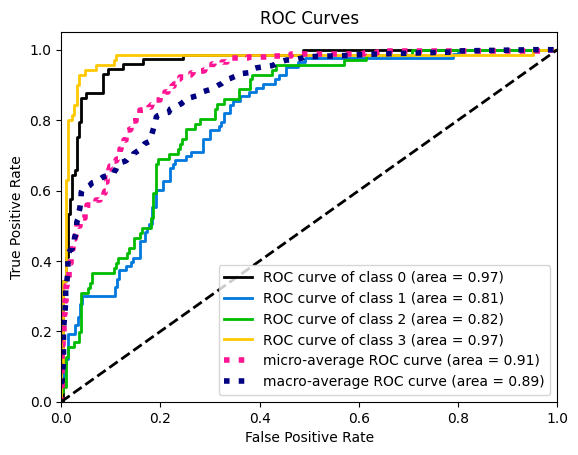

In [39]:
plot_roc(y_test, y_probas)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
parameters = {'max_depth':range(3, 20)}
grid_tree = GridSearchCV(tree, parameters)
grid_tree_result = grid_tree.fit(X_train, y_train)
print(f"Best: {grid_tree_result.best_score_} using {grid_tree_result.best_params_}")

Best: 0.717698081734779 using {'max_depth': 6}


- The model quality


In [41]:
# Estimate scores on test data
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
print("F1 score: ", f1_score(grid_tree_result.predict(X_test), y_test, average='weighted')) # Call predict on the estimator with the best found parameters.
# Calculate accuracy
print("Accuracy: ", accuracy_score(grid_tree_result.predict(X_test), y_test))

F1 score:  0.640235879333073
Accuracy:  0.6430976430976431


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
grid_result.best_params_

{'C': 78.47599703514607, 'penalty': 'l1'}

In [44]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500,
                             C=grid_result.best_params_['C'], penalty=grid_result.best_params_['penalty'],
                             random_state=1)
n_estimators = list(range(5, 101, 5))
n_estimators = [2] + n_estimators
score = []
accuracy = []
for n in n_estimators:
    bg_log_reg = BaggingClassifier(log_reg, n_estimators=n, bootstrap=True, random_state=1)
    bg_log_reg.fit(X_train, y_train)
    score.append(f1_score(bg_log_reg.predict(X_test), y_test, average='weighted'))
    accuracy.append(accuracy_score(bg_log_reg.predict(X_test), y_test))

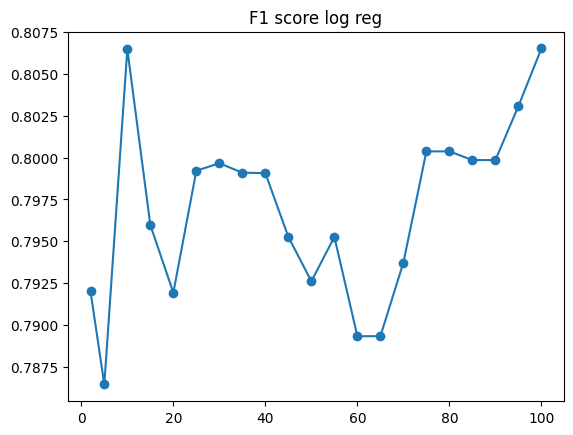

In [45]:
plt.plot(n_estimators, score, marker='o')
plt.title('F1 score log reg')
plt.show()

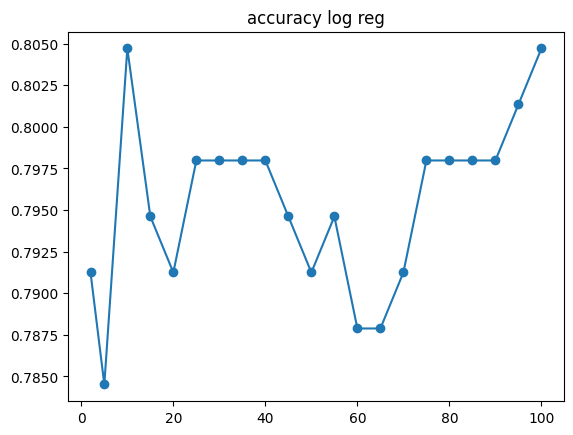

In [46]:
plt.plot(n_estimators, accuracy, marker='o')
plt.title('accuracy log reg')
plt.show()

In [47]:
dec_trees = DecisionTreeClassifier(max_depth=grid_tree_result.best_params_['max_depth'])
n_estimators = list(range(5, 101, 5))
n_estimators = [2] + n_estimators
score = []
accuracy = []
for n in n_estimators:
    bg_dec = BaggingClassifier(dec_trees, n_estimators=n, bootstrap=True, random_state=1)
    bg_dec.fit(X_train, y_train)
    score.append(f1_score(bg_dec.predict(X_test), y_test, average='weighted'))
    accuracy.append(accuracy_score(bg_dec.predict(X_test), y_test))

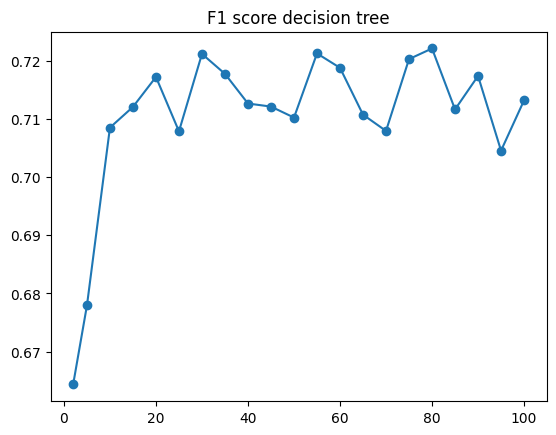

In [48]:
plt.plot(n_estimators, score, marker='o')
plt.title('F1 score decision tree')
plt.show()

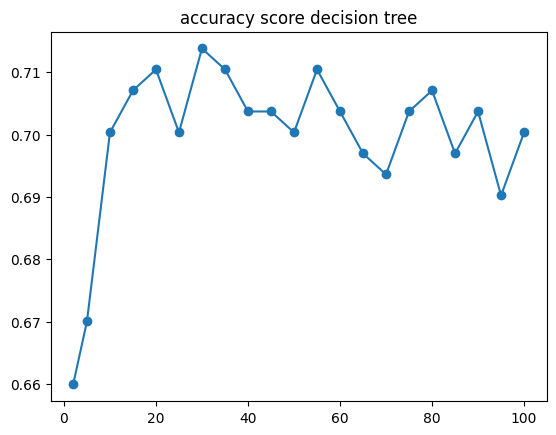

In [49]:
plt.plot(n_estimators, accuracy, marker='o')
plt.title('accuracy score decision tree')
plt.show()

 - __What is the optimal number of algorithms?__ Based on the above plots we conclude that the optimal number of algorithms is around __25__ for the logistic regression and for decision tree. For this number of algorithms maximum of accuracy and F1 score are archieved.
 - __How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?__ No, because in case of bagging we train model in different sets of initial data and repetition of rows in training data may occur. Due to this fact, we cannot be sure that the hyperparameters found earlier are optimal for the bagging classifier case.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [50]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = list(range(5, 101, 5))
n_estimators = [2] + n_estimators
score = []
accuracy = []
for n in n_estimators:
    rfc = RandomForestClassifier(n_estimators=n, bootstrap=True, random_state=1)
    rfc.fit(X_train, y_train)
    score.append(f1_score(rfc.predict(X_test), y_test, average='weighted'))
    accuracy.append(accuracy_score(rfc.predict(X_test), y_test))

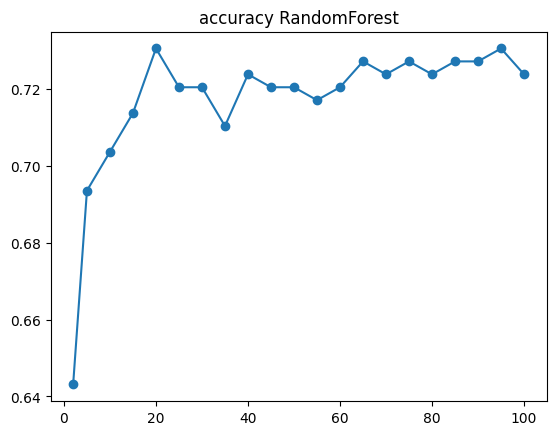

In [51]:
plt.plot(n_estimators, accuracy, marker='o')
plt.title('accuracy RandomForest')
plt.show()

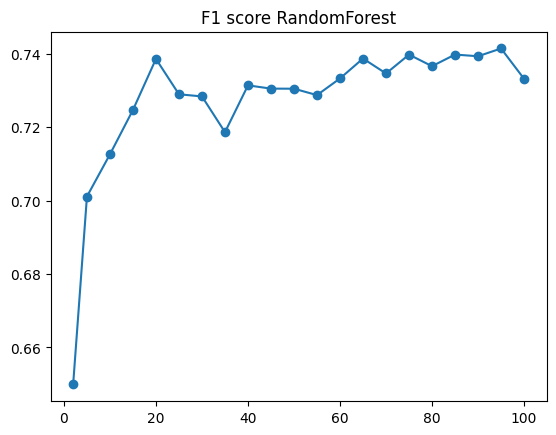

In [65]:
plt.plot(n_estimators, score, marker='o')
plt.title('F1 score RandomForest')
plt.show()

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly

The optimal number of trees is around __20__. Which is almost the same as in 2.6 due to the same bootstraping procedure used.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [53]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=1)

In [63]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500,
                             C=grid_result.best_params_['C'], penalty=grid_result.best_params_['penalty'],
                             random_state=1)
dec_tree = DecisionTreeClassifier(max_depth=grid_tree_result.best_params_['max_depth'])

rfc = RandomForestClassifier(n_estimators=20, bootstrap=True, random_state=1)

N = X_train.shape[0]
indices = list(range(N//10 + 1, N, N//10 + 1))
indices.append(N)

In [64]:
score_lg = []
accuracy_lg = []
score_dt = []
accuracy_dt = []
score_rf = []
accuracy_rf = []
for i in indices:
    log_reg.fit(X_train[:i + 1], y_train[:i + 1])
    dec_tree.fit(X_train[:i + 1], y_train[:i + 1])
    rfc.fit(X_train[:i + 1], y_train[:i + 1])
    score_lg.append(f1_score(log_reg.predict(X_test), y_test, average='weighted'))
    accuracy_lg.append(accuracy_score(log_reg.predict(X_test), y_test))
    score_dt.append(f1_score(dec_tree.predict(X_test), y_test, average='weighted'))
    accuracy_dt.append(accuracy_score(dec_tree.predict(X_test), y_test))
    score_rf.append(f1_score(rfc.predict(X_test), y_test, average='weighted'))
    accuracy_rf.append(accuracy_score(rfc.predict(X_test), y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


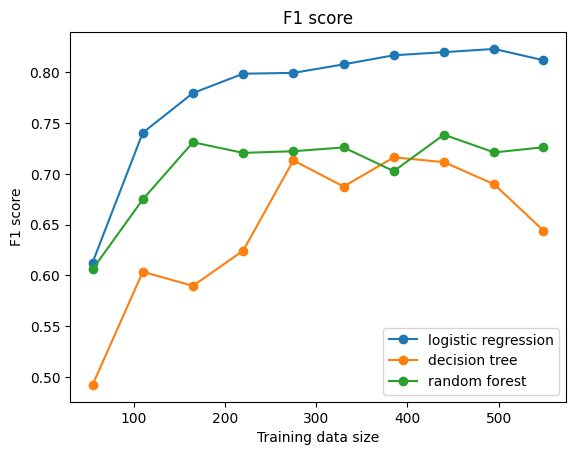

In [77]:
plt.plot(indices, score_lg, marker='o', label='logistic regression')
plt.plot(indices, score_dt, marker='o', label='decision tree')
plt.plot(indices, score_rf, marker='o', label='random forest')
plt.title('F1 score')
plt.xlabel('Training data size')
plt.ylabel('F1 score')
plt.legend()
plt.show()

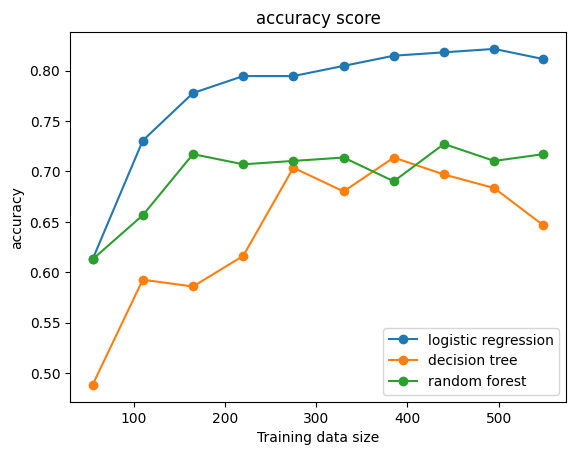

In [78]:
plt.plot(indices, accuracy_lg, marker='o', label='logistic regression')
plt.plot(indices, accuracy_dt, marker='o', label='decision tree')
plt.plot(indices, accuracy_rf, marker='o', label='random forest')
plt.title('accuracy score')
plt.xlabel('Training data size')
plt.ylabel('accuracy')
plt.legend()
plt.show()

From the above plots, we make a conclusion that the logistic regression model has higher accuracy and F1 scores. Moreover, the learning curve for logistic regression model is smoother than other models.